<a href="https://colab.research.google.com/github/BaskaranV15/Implementation-of-CNN/blob/main/deeplearning2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import base64
import numpy as np
import tensorflow as tf


# Append data/mnist.npz to the previous path to get the full path
data_path = "mnist.npz.zip"

# Load data (discard test set)
(training_images, training_labels), _ = tf.keras.datasets.mnist.load_data(path=data_path)

print(f"training_images is of type {type(training_images)}.\ntraining_labels is of type {type(training_labels)}\n")

# Inspect shape of the data
data_shape = training_images.shape

print(f"There are {data_shape[0]} examples with shape ({data_shape[1]}, {data_shape[2]})")
def reshape_and_normalize(images):
    """Reshapes the array of images and normalizes pixel values.

    Args:
        images (numpy.ndarray): The images encoded as numpy arrays

    Returns:
        numpy.ndarray: The reshaped and normalized images.
    """

    ### START CODE HERE ###

    # Reshape the images to add an extra dimension (at the right-most side of the array)
    images = images[..., np.newaxis]

    # Normalize pixel values
    images = images / 255.0

    ### END CODE HERE ###

    return images
# Reload the images in case you run this cell multiple times
(training_images, _), _ = tf.keras.datasets.mnist.load_data(path=data_path)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
training_images is of type <class 'numpy.ndarray'>.
training_labels is of type <class 'numpy.ndarray'>

There are 60000 examples with shape (28, 28)


In [ ]:

# Apply your function
training_images = reshape_and_normalize(training_images)
print('Name: BASKARAN V           RegisterNumber: 212222230020        \n')
print(f"Maximum pixel value after normalization: {np.max(training_images)}\n")
print(f"Shape of training set after reshaping: {training_images.shape}\n")
print(f"Shape of one image after reshaping: {training_images[0].shape}")


Name: BASKARAN V           RegisterNumber: 212222230020        

Maximum pixel value after normalization: 1.0

Shape of training set after reshaping: (60000, 28, 28, 1)

Shape of one image after reshaping: (28, 28, 1)


In [ ]:
class EarlyStoppingCallback(tf.keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs=None):
        # Check if the accuracy is greater or equal to 0.995
        if logs.get('accuracy') >= 0.995:
            # Stop training once the above condition is met
            self.model.stop_training = True
            print("\nReached 99.5% accuracy so cancelling training!")

In [ ]:

def convolutional_model():
    """Returns the compiled (but untrained) convolutional model.

    Returns:
        tf.keras.Model: The model which should implement convolutions.
    """


    # Define the model
    model = tf.keras.models.Sequential([
        # Convolutional layer with 32 filters, 3x3 kernel size, and ReLU activation
        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
        # Max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # Max pooling layer
        tf.keras.layers.MaxPooling2D((2, 2)),
        # Convolutional layer with 64 filters, 3x3 kernel size, and ReLU activation
        tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
        # Flatten layer to convert 2D outputs to 1D
        tf.keras.layers.Flatten(),
        # Dense layer with 64 units and ReLU activation
        tf.keras.layers.Dense(64, activation='relu'),
        # Output layer with 10 units (one for each class) and softmax activation
        tf.keras.layers.Dense(10, activation='softmax')
    ])

     # Compile the model
    model.compile(
        optimizer='adam',
        loss='sparse_categorical_crossentropy',
        metrics=['accuracy']
    )

    return model


In [ ]:
model = convolutional_model()
training_history = model.fit(training_images, training_labels, epochs=15, callbacks=[EarlyStoppingCallback()])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 87s 45ms/step - accuracy: 0.8884 - loss: 0.3616
Epoch 2/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 119s 33ms/step - accuracy: 0.9854 - loss: 0.0484
Epoch 3/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9896 - loss: 0.0331
Epoch 4/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 79s 31ms/step - accuracy: 0.9918 - loss: 0.0243
Epoch 5/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9949 - loss: 0.0165
Epoch 6/15
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.9964 - loss: 0.0129
Reached 99.5% accuracy so cancelling training!
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 62s 33ms/step - accuracy: 0.9964 - loss: 0.0129


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 279,968 (1.07 MB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 186,646 (729.09 KB)

In [ ]:
loss, accuracy = model.evaluate(training_images, training_labels)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 12ms/step - accuracy: 0.9933 - loss: 3.2519
Loss: 3.252117872238159
Accuracy: 0.9933666586875916


In [ ]:
(training_images, training_labels), (test_images,test_lables) = tf.keras.datasets.mnist.load_data(path=data_path)

In [ ]:
loss, accuracy = model.evaluate(test_images, test_lables)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")


313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9858 - loss: 8.8723
Loss: 7.284592151641846
Accuracy: 0.9887999892234802


In [ ]:
test=test_images[0]

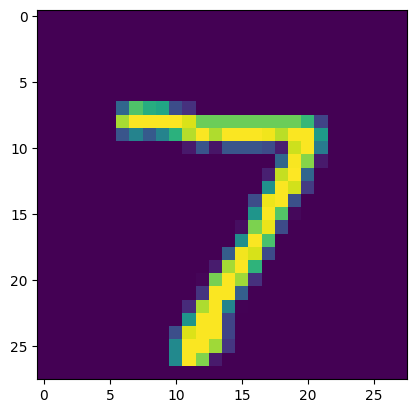

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(test)

In [ ]:
import numpy as np

# Reshape 'test' to add the channel dimension
test = test.reshape(1, 28, 28, 1)

# Now, try making predictions again
predictions = model.predict(test)
print(predictions)
predicted_classes = np.argmax(predictions, axis=1)

print(predicted_classes)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
[7]
